# Fundamentos de la Programación (Grado en Ingeniería de la Salud)
## Ejercicio "Electricidad"

Antes de empezar, ejecutaremos la siguiente celda con las importaciones necesarias para poder realizar el ejercicio:

In [18]:
import csv
from datetime import datetime
from matplotlib import pyplot as plt
from collections import namedtuple

## 1. Carga de datos (0.5 puntos)

Tomaremos los datos de un fichero de entrada llamado <code>data.csv</code> en el que se encuentran registrados datos sobre los precios de la electricidad agrupados por días para los últimos años. El fichero se encuentra en la carpeta <code>./data</code>. Cada línea del fichero de entrada contiene las siguientes informaciones:

geoid,geoname,precio,fecha
- **geoid:** identificador de la zona geográfica
- **geoname:** nombre de la zona geográfica
- **precio:** precio de la electricidad
- **fecha:** fecha a la que corresponden los datos

He aquí un fragmento con las primeras líneas del fichero de entrada:

<img src="./img/data.PNG" alt="Drawing" width="500"/>

La primera función que implementaremos será la de lectura. Será la encargada de leer los datos del fichero de entrada y cargarlos en una lista de tuplas:

In [19]:
Registro = namedtuple('Registro', 'geoid geoname precio fecha')

def lee_registros(fichero):
    ''' Lee el fichero de entrada y devuelve una lista de registros
    
    ENTRADA:
       - fichero: nombre del fichero de entrada
    SALIDA:
       - lista de registros -> [Registro(int, str, float, datetime.date)]

    Hay que transformar ciertos elementos de la entrada con los tipos correctos para que puedan 
    ser procesados posteriormente.
    
    Para convertir la fecha del registro de tipo str a datetime puedes usar la expresión:
       datetime.strptime(fecha, '%Y-%m-%d').date()
    '''
    registros = []
    with open(fichero, 'r', encoding='utf-8') as f:
        lector = csv.reader(f)
        next(lector)
        registros = [Registro(int(geoid), geoname, float(precio), datetime.strptime(fecha,'%Y-%m-%d').date())
                    for geoid, geoname, precio, fecha in lector]
    return registros

In [20]:
# Test de la función lee_registros
REGISTROS = lee_registros('./data/data.csv')

# La salida esperada de la siguiente instrucción es: 
# 1090 [Registro(geoid=8741, geoname='Península', precio=166.77125, fecha=datetime.datetime(2021, 6, 1)),
#     Registro(geoid=8742, geoname='Canarias', precio=166.77125, fecha=datetime.datetime(2021, 6, 1)),
#     Registro(geoid=8743, geoname='Baleares', precio=166.77125, fecha=datetime.datetime(2021, 6, 1)),
#     Registro(geoid=8744, geoname='Ceuta', precio=166.77833333333334, fecha=datetime.datetime(2021, 6, 1)),
#     Registro(geoid=8745, geoname='Melilla', precio=166.77833333333334, fecha=datetime.datetime(2021, 6, 1))]
print(len(REGISTROS), REGISTROS[:5])

1090 [Registro(geoid=8741, geoname='Península', precio=166.77125, fecha=datetime.date(2021, 6, 1)), Registro(geoid=8742, geoname='Canarias', precio=166.77125, fecha=datetime.date(2021, 6, 1)), Registro(geoid=8743, geoname='Baleares', precio=166.77125, fecha=datetime.date(2021, 6, 1)), Registro(geoid=8744, geoname='Ceuta', precio=166.77833333333334, fecha=datetime.date(2021, 6, 1)), Registro(geoid=8745, geoname='Melilla', precio=166.77833333333334, fecha=datetime.date(2021, 6, 1))]


## 2. Consulta y filtrado (7.5 puntos)

Una vez que hemos cargado los datos en una estructura en memoria ya podemos empezar a procesarlos. En esta sección implementaremos algunas funciones de consulta y filtrado que nos permitirán trabajar con ellos.

La primera función se llama <code>calcula_zonas</code> y obtiene la lista de los nombres de zonas geográficas presentes en el conjunto de datos, ordenada alfabéticamente.

In [21]:
def calcula_zonas(registros):
    ''' Lista ordenada de los nombres de las zonas geográficas
    
    ENTRADA:
       - registros: lista de registros -> [Registro(int, str, float, datetime.date)]
    SALIDA:
       - Lista de regiones distintas ordenada alfabéticamente -> [str]
    '''
    return sorted(list({r.geoname for r in registros}))

In [22]:
# Test de la función calcula_zonas

# La salida esperada de las siguientes instrucciones es: 
# ['Baleares', 'Canarias', 'Ceuta', 'Melilla', 'Península']

print(calcula_zonas(REGISTROS))

['Baleares', 'Canarias', 'Ceuta', 'Melilla', 'Península']


La siguiente función se llama <code>filtra_precios_por_zonas</code>. Toma una lista de registros, una lista de zonas que pueden venir especificadas por sus identificadores (geoid) o sus nombres (geoname). Deberá seleccionar solamente aquellos registros de las zonas indicadas.

In [23]:
def filtra_precios_por_zonas(registros, zonas):
    ''' Selecciona registros por zonas, que pueden venir especificadas usando sus identificadores o sus nombres.
    
    ENTRADA:
       - registros: lista de registros -> [Registro(int, str, float, datetime.date)]
       - zonas: zonas geográficas a tener en cuenta -> [str|int]
    SALIDA:
       - lista de registros seleccionados -> [Registro(int, str, float, datetime.date)]
    '''
    filtrados = [r for r in registros if r.geoid in zonas or r.geoname in zonas]
    return filtrados

In [24]:
# Test de la función filtra_precios_por_zonas

# La salida esperada de las siguientes instrucciones es: 
# 436 [Registro(geoid=8744, geoname='Ceuta', precio=166.77833333333334, datetime.datetime(2021, 6, 1)), 
#      Registro(geoid=8745, geoname='Melilla', precio=166.77833333333334, fecha=datetime.datetime(2021, 6, 1)), 
#      Registro(geoid=8744, geoname='Ceuta', precio=164.77875, fecha=datetime.datetime(2021, 6, 2))]

filtrados = filtra_precios_por_zonas(REGISTROS, ['Ceuta', 8745])
print(len(filtrados), filtrados[:3])

436 [Registro(geoid=8744, geoname='Ceuta', precio=166.77833333333334, fecha=datetime.date(2021, 6, 1)), Registro(geoid=8745, geoname='Melilla', precio=166.77833333333334, fecha=datetime.date(2021, 6, 1)), Registro(geoid=8744, geoname='Ceuta', precio=164.77875, fecha=datetime.date(2021, 6, 2))]


La siguiente función se llama <code>extrae_datos_por_precios</code>. Toma una lista de registros, un precio mínimo y el tamaño máximo de la lista a devolver. Produce como salida una lista de tuplas <code>(geoname, precio, fecha)</code> con los datos que superan el precio mínimo, respetando el tamaño máximo indicado y por orden decreciente de precios.

In [25]:
def extrae_datos_por_precios(registros, minimo, limite=10):
    ''' Extrae las tres columnas (geoname, precio, fecha) para los registros que superan el precio 'minimo'
        devolviendo una lista de tuplas ordenada de forma decreciente por precio y con el tamaño máximo que
        indique 'limite'.
    
    ENTRADA:
       - registros: lista de registros -> [Registro(int, str, float, datetime.date)]
       - minimo: precio mínimo de los registros a extraer -> float
       - limite: tamaño máximo de la lista a devolver -> int
    SALIDA:
       - lista de tuplas (fecha, casos, omicron) -> [(str, float, str)]
    
    '''
    resultado = [(r.geoname, r.precio, r.fecha) for r in registros if r.precio > minimo]
    
    return sorted(resultado, reverse=True, key=lambda x:x[1])[:limite]

In [26]:
# Test de la función extrae_datos_por_precios

# La salida esperada de las siguientes instrucciones es:
# 5 [('Península', 491.9525, datetime.datetime(2021, 12, 23)), 
#    ('Canarias', 491.9525, datetime.datetime(2021, 12, 23)), 
#    ('Baleares', 491.9525, datetime.datetime(2021, 12, 23)), 
#    ('Ceuta', 491.9504166666667, datetime.datetime(2021, 12, 23)), 
#    ('Melilla', 491.9504166666667, datetime.datetime(2021, 12, 23))]
datos = extrae_datos_por_precios(REGISTROS, 200.0, 5)
print(len(datos), datos[:10])

5 [('Península', 491.9525, datetime.date(2021, 12, 23)), ('Canarias', 491.9525, datetime.date(2021, 12, 23)), ('Baleares', 491.9525, datetime.date(2021, 12, 23)), ('Ceuta', 491.9504166666667, datetime.date(2021, 12, 23)), ('Melilla', 491.9504166666667, datetime.date(2021, 12, 23))]


La siguiente función de esta sección se llama <code>divide_datos</code>. Toma como entradas una lista de registros y una función que recibe un registro y devuelve un valor True si el registro debe ir en la primera lista o False si debe ir en la segunda.

In [27]:
def divide_datos(registros, criterio):
    ''' Separa los datos de entrada en dos listas según lo indicado por una función 'criterio', la cual 
        recibe un registro y devuelve un valor True o False indicando que el registro debe ir en la primera
        o segunda lista a devolver respectivamente.
    
    ENTRADA:
       - registros: lista de registros -> [Registro(int, str, float, datetime.date)]
       - criterio: nombre de función, o expresión lambda -> function (Registro -> bool)
    SALIDA:
       - listas en donde quedan los registros de entrada almacenados según 'criterio' -> ([Registro],[Registro])
    '''
    lista1 = [r for r in registros if criterio(r)]
    lista2 = [r for r in registros if not criterio(r)]
    
    return (lista1, lista2)

In [28]:
### EJERCICIO: implementar una llamada de TEST de 'divide_datos' que separe los datos en 2 listas:
#   lista 1: registros de la península
#   lista 2: registros del resto de zonas geográficas

# La salida esperada para esta consulta es:
# 218 [Registro(geoid=8741, geoname='Península', precio=166.77125, fecha=datetime.datetime(2021, 6, 1)),
#     Registro(geoid=8741, geoname='Península', precio=164.775, fecha=datetime.datetime(2021, 6, 2)),
#     Registro(geoid=8741, geoname='Península', precio=159.23, fecha=datetime.datetime(2021, 6, 3))]
#
# 872 [Registro(geoid=8742, geoname='Canarias', precio=166.77125, fecha=datetime.datetime(2021, 6, 1)),
#     Registro(geoid=8743, geoname='Baleares', precio=166.77125, fecha=datetime.datetime(2021, 6, 1)),
#     Registro(geoid=8744, geoname='Ceuta', precio=166.77833333333334, fecha=datetime.datetime(2021, 6, 1))]

lista1, lista2 = divide_datos(REGISTROS, lambda r:r.geoname == 'Península')
print(len(lista1), lista1[:3])
print()
print(len(lista2), lista2[:3])

218 [Registro(geoid=8741, geoname='Península', precio=166.77125, fecha=datetime.date(2021, 6, 1)), Registro(geoid=8741, geoname='Península', precio=164.775, fecha=datetime.date(2021, 6, 2)), Registro(geoid=8741, geoname='Península', precio=159.23, fecha=datetime.date(2021, 6, 3))]

872 [Registro(geoid=8742, geoname='Canarias', precio=166.77125, fecha=datetime.date(2021, 6, 1)), Registro(geoid=8743, geoname='Baleares', precio=166.77125, fecha=datetime.date(2021, 6, 1)), Registro(geoid=8744, geoname='Ceuta', precio=166.77833333333334, fecha=datetime.date(2021, 6, 1))]


La siguiente función se llama <code>precio_medio_por_zona</code>. Toma como entrada una lista de registros y produce como salida un diccionario cuyas claves son las zonas geográficas (por nombre) y los valores son los precios medios para cada zona geográfica.

In [29]:
def precio_medio_por_zona(registros):
    ''' Crea un diccionario con el precio medio por zona geográfica
    
    ENTRADA:
       - registros: lista de registros -> [Registro(int, str, float, datetime.date)]
    SALIDA:
       - diccionario con los precios medios por cada nombre de zona geográfica -> {str: float}
    '''
    resultado = dict()
    zonas = {r.geoname for r in registros}
    for zona in zonas:
        filtradas = [r.precio for r in registros if r.geoname == zona]
        resultado[zona] = sum(filtradas)/len(filtradas)
    return resultado

In [30]:
# Test de la función precio_medio_por_zona

# La salida esperada de la siguiente instrucción es (el orden de los elementos puede variar): 
#   {'Baleares': 217.56263195718654,
#    'Canarias': 217.56263195718654,
#    'Melilla': 217.5666590978593,
#    'Ceuta': 217.5666590978593,
#    'Península': 217.56263195718654}
precio_medio_por_zona(REGISTROS)

{'Península': 217.56263195718654,
 'Melilla': 217.5666590978593,
 'Baleares': 217.56263195718654,
 'Ceuta': 217.5666590978593,
 'Canarias': 217.56263195718654}

## 3. Visualización (2 puntos)

La función de visualización que implementaremos será <code>muestra_evolucion</code>. Toma como entrada una lista de registros, una fecha y una lista de regiones y genera una gráfica de barras con una barra para cada región indicando su número de casos para la fecha indicada.

In [31]:
def muestra_evolucion(registros, zona, fecha_ini, fecha_fin):
    ''' Genera una curva con la evolución del precio de una zona geográfica entre dos fechas dadas. 
        La zona geográfica puede darse como su nombre o su identificador numérico.
        Podremos presuponer que los datos están ya ordenados por fecha.
    
    ENTRADA: 
       - registros: lista de tuplas -> [Registro(int, str, float, str)]
       - zona: de la que se generará la gráfica -> str|int
       - fecha_ini: fecha límite inferior -> datetime.date
       - fecha_fin: fecha límite superior -> datetime.date
    SALIDA EN PANTALLA: 
       - diagrama con la evolución de los precios de la zona

    Estas son las instrucciones 'matplotlib' para trazar el gráfico:
        plt.title(titulo)
        plt.xticks(range(len(l_fechas)), l_fechas, rotation='vertical')
        plt.plot(l_fechas,l_precios)
        plt.show()

    Que se apoyan en las siguientes variables:
        - titulo: una cadena con el título que se va a mostrar en el gráfico
        - l_fechas: lista de fechas para las que se muestran los datos
        - l_precios: lista de precios alineada con la lista de fechas (con el mismo orden)
        
    Para convertir un objeto de tipo date a str puedes usar la expresión:
        fecha.strftime("%d/%m/%Y")
    '''
    datos_filtrados = [(r.precio, r.fecha) for r in registros if (r.geoname == zona or r.geoid == zona) and fecha_ini <= r.fecha <= fecha_fin]
    l_precios = [precio for precio,_ in datos_filtrados]
    l_fechas = [fecha.strftime("%d/%m/%Y") for _,fecha in datos_filtrados]

    titulo='Evolución del precio'
    plt.title(titulo)
    plt.xticks(range(len(l_fechas)), l_fechas, rotation='vertical')
    plt.plot(l_fechas,l_precios)
    plt.show()



La salida de la siguiente celda de test debería ser la siguiente:

<img src="./img/evolucion.PNG" alt="Drawing" width="400"/>

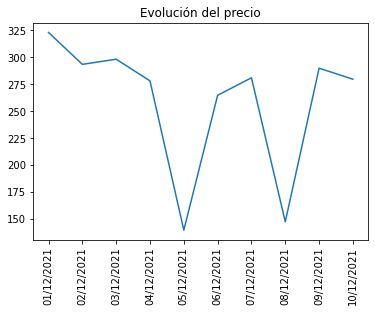

In [32]:
# Test de la función muestra_comparativa_regiones
muestra_evolucion(REGISTROS, 'Península', datetime(2021,12,1).date(), datetime(2021,12,10).date())